EDA

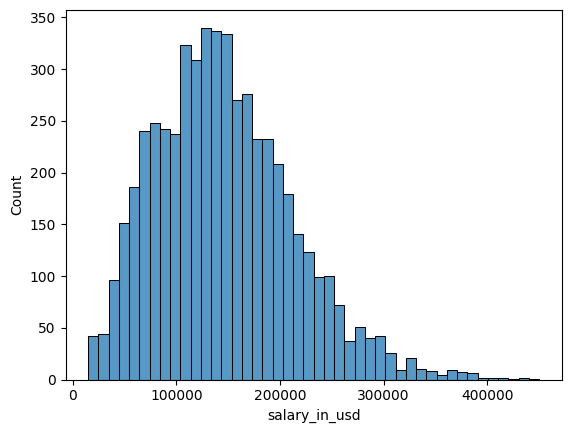

         work_year  salary_in_usd  new_feature1
count  5341.000000    5341.000000  5.341000e+03
mean   2022.682082  146258.409099  2.958415e+08
std       0.608026   66594.117529  1.347121e+08
min    2020.000000   15000.000000  3.030000e+07
25%    2022.000000   98506.000000  1.991791e+08
50%    2023.000000  140000.000000  2.832200e+08
75%    2023.000000  186000.000000  3.762780e+08
max    2023.000000  450000.000000  9.090000e+08


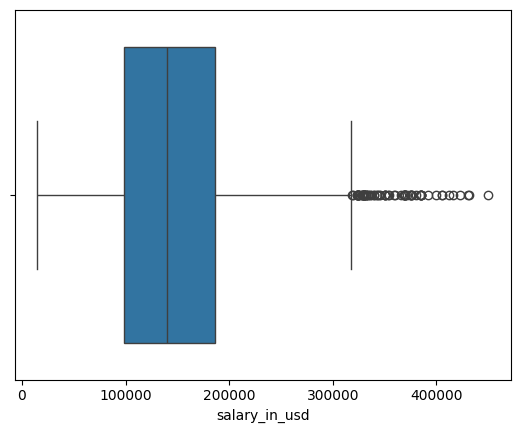

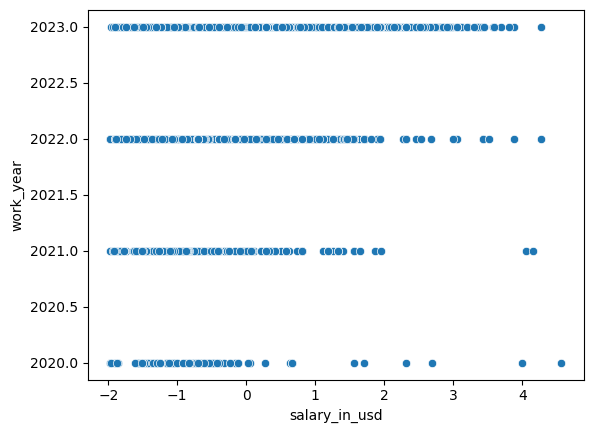

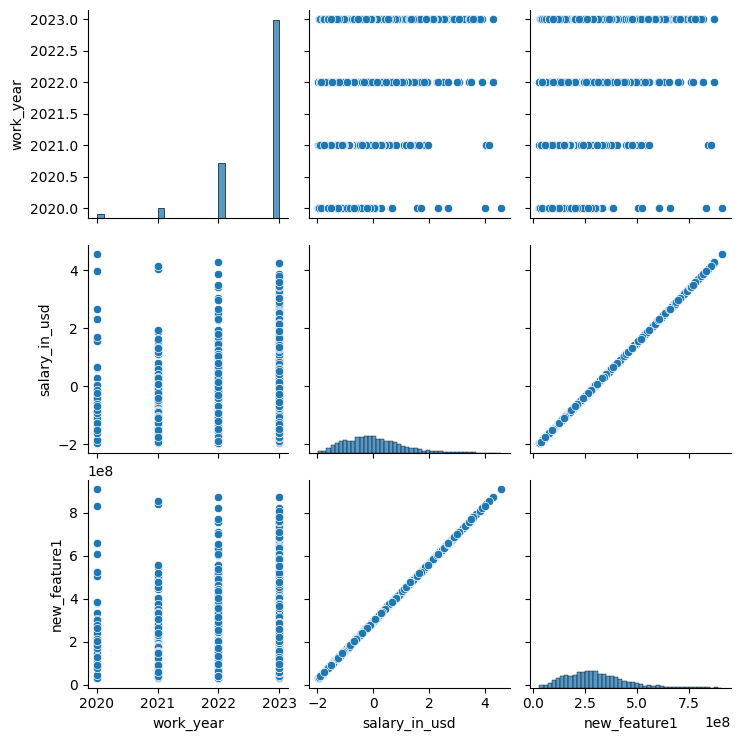

In [ ]:
# Step 1: Import Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Step 2: Reading dataset
df = pd.read_csv('/content/jobs_in_data.csv')
# Step 3: Data reduction
df = df.drop(['job_category', 'salary'], axis=1)
#Step 4: Feature engineering
df['new_feature1'] = df['salary_in_usd'] * df['work_year']
# Step 5: Creating features
df['new_feature1'] = df['salary_in_usd'] * df['work_year']
#Step 6: Data cleaning/wrangling
df = df.dropna()
df = df.drop_duplicates()
df = df[df['salary_in_usd'] > 0]
#EDA
sns.histplot(df['salary_in_usd'])
plt.show()
#statistic summary
print(df.describe())
# Step 9: EDA univariate analysis
sns.boxplot(x='salary_in_usd', data=df)
plt.show()
# Step 10: Data transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['salary_in_usd'] = scaler.fit_transform(df[['salary_in_usd']])
# Step 11: EDA bivariate analysis
sns.scatterplot(x='salary_in_usd', y='work_year', data=df)
plt.show()
# Step 12: EDA multivariate analysis
sns.pairplot(df)
plt.show()
# Step 13: Impute missing values (if needed)
df['salary_in_usd'] = df['salary_in_usd'].fillna(df['salary_in_usd'].mean())








Step 1: Import Python Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

Step 2: Reading Dataset

In [ ]:
data = pd.read_csv('/content/jobs_in_data.csv')

Analayzing Data

In [ ]:
data.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [ ]:
data.tail()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S
9354,2020,Business Data Analyst,Data Analysis,USD,100000,100000,United States,Entry-level,Contract,Remote,United States,L


In [ ]:
data.info() # data type,null or not null,number of records in each column,memory etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [ ]:
data.nunique()  #to check duplicate of data

work_year                4
job_title              125
job_category            10
salary_currency         11
salary                1507
salary_in_usd         1786
employee_residence      83
experience_level         4
employment_type          4
work_setting             3
company_location        70
company_size             3
dtype: int64

In [ ]:
data.isnull().sum() #to calculate the missing values

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [ ]:
(data.isnull().sum()/(len(data)))*100 #to calculate missing values in percentage

work_year             0.0
job_title             0.0
job_category          0.0
salary_currency       0.0
salary                0.0
salary_in_usd         0.0
employee_residence    0.0
experience_level      0.0
employment_type       0.0
work_setting          0.0
company_location      0.0
company_size          0.0
dtype: float64

Step 3: Data Reduction

In [ ]:
# Remove S.No. column from data
data = data.drop(['work_year'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           9355 non-null   object
 1   job_category        9355 non-null   object
 2   salary_currency     9355 non-null   object
 3   salary              9355 non-null   int64 
 4   salary_in_usd       9355 non-null   int64 
 5   employee_residence  9355 non-null   object
 6   experience_level    9355 non-null   object
 7   employment_type     9355 non-null   object
 8   work_setting        9355 non-null   object
 9   company_location    9355 non-null   object
 10  company_size        9355 non-null   object
dtypes: int64(2), object(9)
memory usage: 804.1+ KB


Step 5: Creating Features

In [ ]:
from datetime import date

# Assuming 'experience_level' is a string with words like 'Entry Level', 'Mid Level', etc.
level_mapping = {'Entry Level': 0, 'Mid Level': 5, 'Senior Level': 10}

# Map 'experience_level' to numerical values using the dictionary
data['Years_Experience'] = date.today().year - data['experience_level'].map(level_mapping)

data.head()


,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,Years_Experience
0,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L,NaN
1,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M,NaN
2,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M,NaN
3,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M,NaN
4,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M,NaN


In [ ]:
# Splitting the 'job_title' column to extract 'Department' and 'Role'
split_data = data['job_title'].str.split('-', 1, expand=True)

# Check if the split operation resulted in two columns
if len(split_data.columns) == 2:
    data[['Department', 'Role']] = split_data
else:
    # If not, set default values or handle it as needed
    data['Department'] = data['job_title']
    data['Role'] = None  # You can set a default value or handle it as needed

data[['job_title', 'Department', 'Role']]



,job_title,Department,Role
0,Data DevOps Engineer,Data DevOps Engineer,None
1,Data Architect,Data Architect,None
2,Data Architect,Data Architect,None
3,Data Scientist,Data Scientist,None
4,Data Scientist,Data Scientist,None
...,...,...,...
9350,Data Specialist,Data Specialist,None
9351,Data Scientist,Data Scientist,None
9352,Principal Data Scientist,Principal Data Scientist,None
9353,Data Scientist,Data Scientist,None


Step 6: Data Cleaning/Wrangling

In [ ]:
print(data.Department.unique())
print(data.Role.nunique())

['Data DevOps Engineer' 'Data Architect' 'Data Scientist'
 'Machine Learning Researcher' 'Data Engineer' 'Machine Learning Engineer'
 'Data Analyst' 'Analytics Engineer' 'Applied Scientist' 'BI Developer'
 'Business Intelligence Engineer' 'Research Scientist' 'Research Analyst'
 'Research Engineer' 'Data Science Engineer' 'Data Quality Analyst'
 'Data Product Manager' 'Machine Learning Scientist' 'AI Engineer'
 'MLOps Engineer' 'Deep Learning Engineer' 'Data Modeler'
 'Data Product Owner' 'Data Science Consultant'
 'Business Intelligence Analyst' 'AI Developer' 'Data Manager'
 'ML Engineer' 'Data Science Director' 'Head of Data' 'BI Analyst'
 'Data Management Analyst' 'Machine Learning Modeler' 'Data Specialist'
 'BI Data Analyst' 'Data Integration Engineer'
 'Business Intelligence Manager' 'Data Integration Specialist'
 'Data Science Practitioner' 'Business Intelligence Developer'
 'AI Research Engineer' 'Data Lead' 'Data Management Specialist'
 'AI Architect' 'Data Science Manager' '

In [ ]:
data["Department"].replace({"Staff Machine Learning Engineer": " Data Scientist", "Staff Data Scientist": "Machine Learning Engineer"}, inplace=True)
print(data.Department.unique())
print(data.Role.nunique())

['Data DevOps Engineer' 'Data Architect' 'Data Scientist'
 'Machine Learning Researcher' 'Data Engineer' 'Machine Learning Engineer'
 'Data Analyst' 'Analytics Engineer' 'Applied Scientist' 'BI Developer'
 'Business Intelligence Engineer' 'Research Scientist' 'Research Analyst'
 'Research Engineer' 'Data Science Engineer' 'Data Quality Analyst'
 'Data Product Manager' 'Machine Learning Scientist' 'AI Engineer'
 'MLOps Engineer' 'Deep Learning Engineer' 'Data Modeler'
 'Data Product Owner' 'Data Science Consultant'
 'Business Intelligence Analyst' 'AI Developer' 'Data Manager'
 'ML Engineer' 'Data Science Director' 'Head of Data' 'BI Analyst'
 'Data Management Analyst' 'Machine Learning Modeler' 'Data Specialist'
 'BI Data Analyst' 'Data Integration Engineer'
 'Business Intelligence Manager' 'Data Integration Specialist'
 'Data Science Practitioner' 'Business Intelligence Developer'
 'AI Research Engineer' 'Data Lead' 'Data Management Specialist'
 'AI Architect' 'Data Science Manager' '

Step 8: Statistics Summary

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
salary,9355.0,149927.981293,63608.835387,14000.0,105200.0,143860.0,187000.0,450000.0
salary_in_usd,9355.0,150299.495564,63177.372024,15000.0,105700.0,143000.0,186723.0,450000.0
Years_Experience,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
job_title,9355,125,Data Engineer,2195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_category,9355,10,Data Science and Research,3014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_currency,9355,11,USD,8591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,9355.0,NaN,NaN,NaN,149927.981293,63608.835387,14000.0,105200.0,143860.0,187000.0,450000.0
salary_in_usd,9355.0,NaN,NaN,NaN,150299.495564,63177.372024,15000.0,105700.0,143000.0,186723.0,450000.0
employee_residence,9355,83,United States,8086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
experience_level,9355,4,Senior,6709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,9355,4,Full-time,9310,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_setting,9355,3,In-person,5730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_location,9355,70,United States,8132,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#separate Numerical and categorical variables for easy analysis
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['job_title', 'job_category', 'salary_currency', 'employee_residence',
       'experience_level', 'employment_type', 'work_setting',
       'company_location', 'company_size', 'Department', 'Role'],
      dtype='object')
Numerical Variables:
['salary', 'salary_in_usd', 'Years_Experience']


Step 9: EDA Univariate Analysis

salary
Skew : 0.58


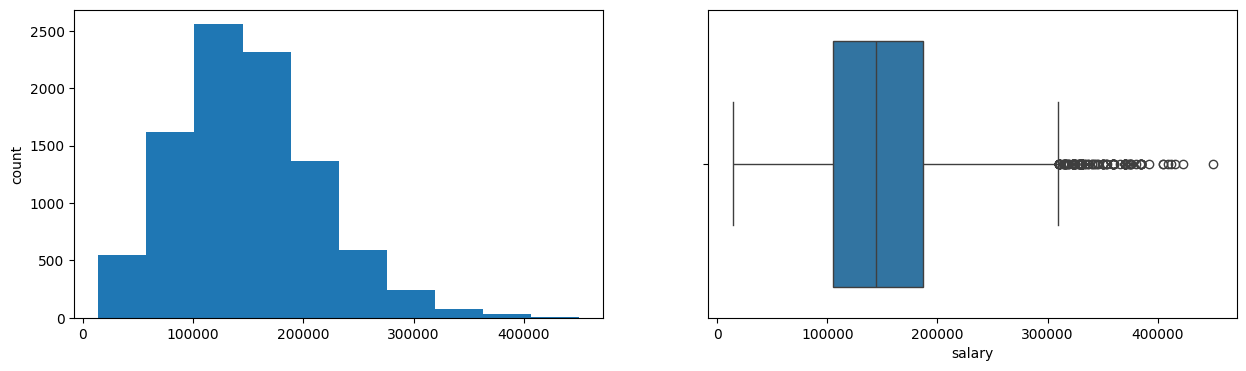

salary_in_usd
Skew : 0.62


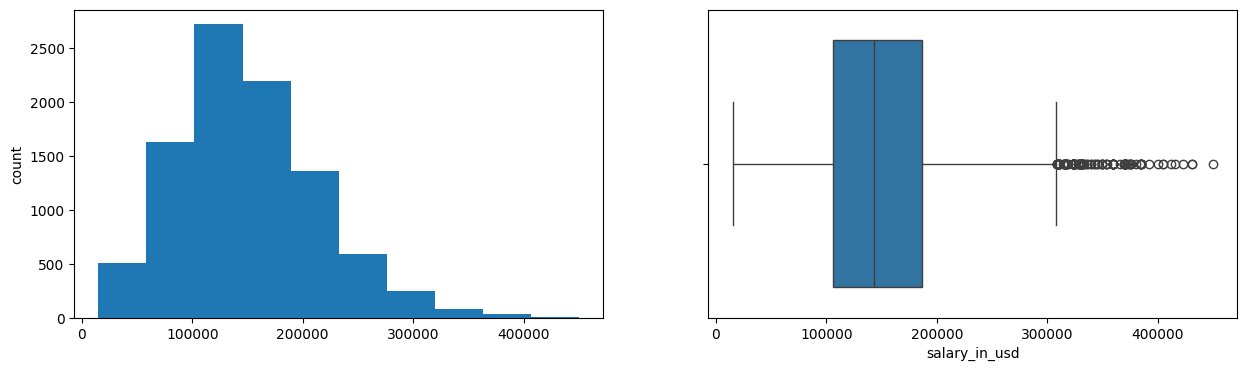

Years_Experience
Skew : No meaningful skewness due to constant values


In [ ]:
import numpy as np

for col in num_cols:
    print(col)
    skewness = data[col].skew()

    # Check if skewness is NaN or if the column has only one unique value
    if np.isnan(skewness) or data[col].nunique() < 2:
        print(f'Skew : No meaningful skewness due to constant values')
    else:
        print('Skew :', round(skewness, 2))
        plt.figure(figsize=(15, 4))

        plt.subplot(1, 2, 1)
        data[col].hist(grid=False)
        plt.ylabel('count')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[col].dropna())

        plt.show() #a histogram and box plot is used to show the pattern of the variables, as some variables have skewness and outliers.


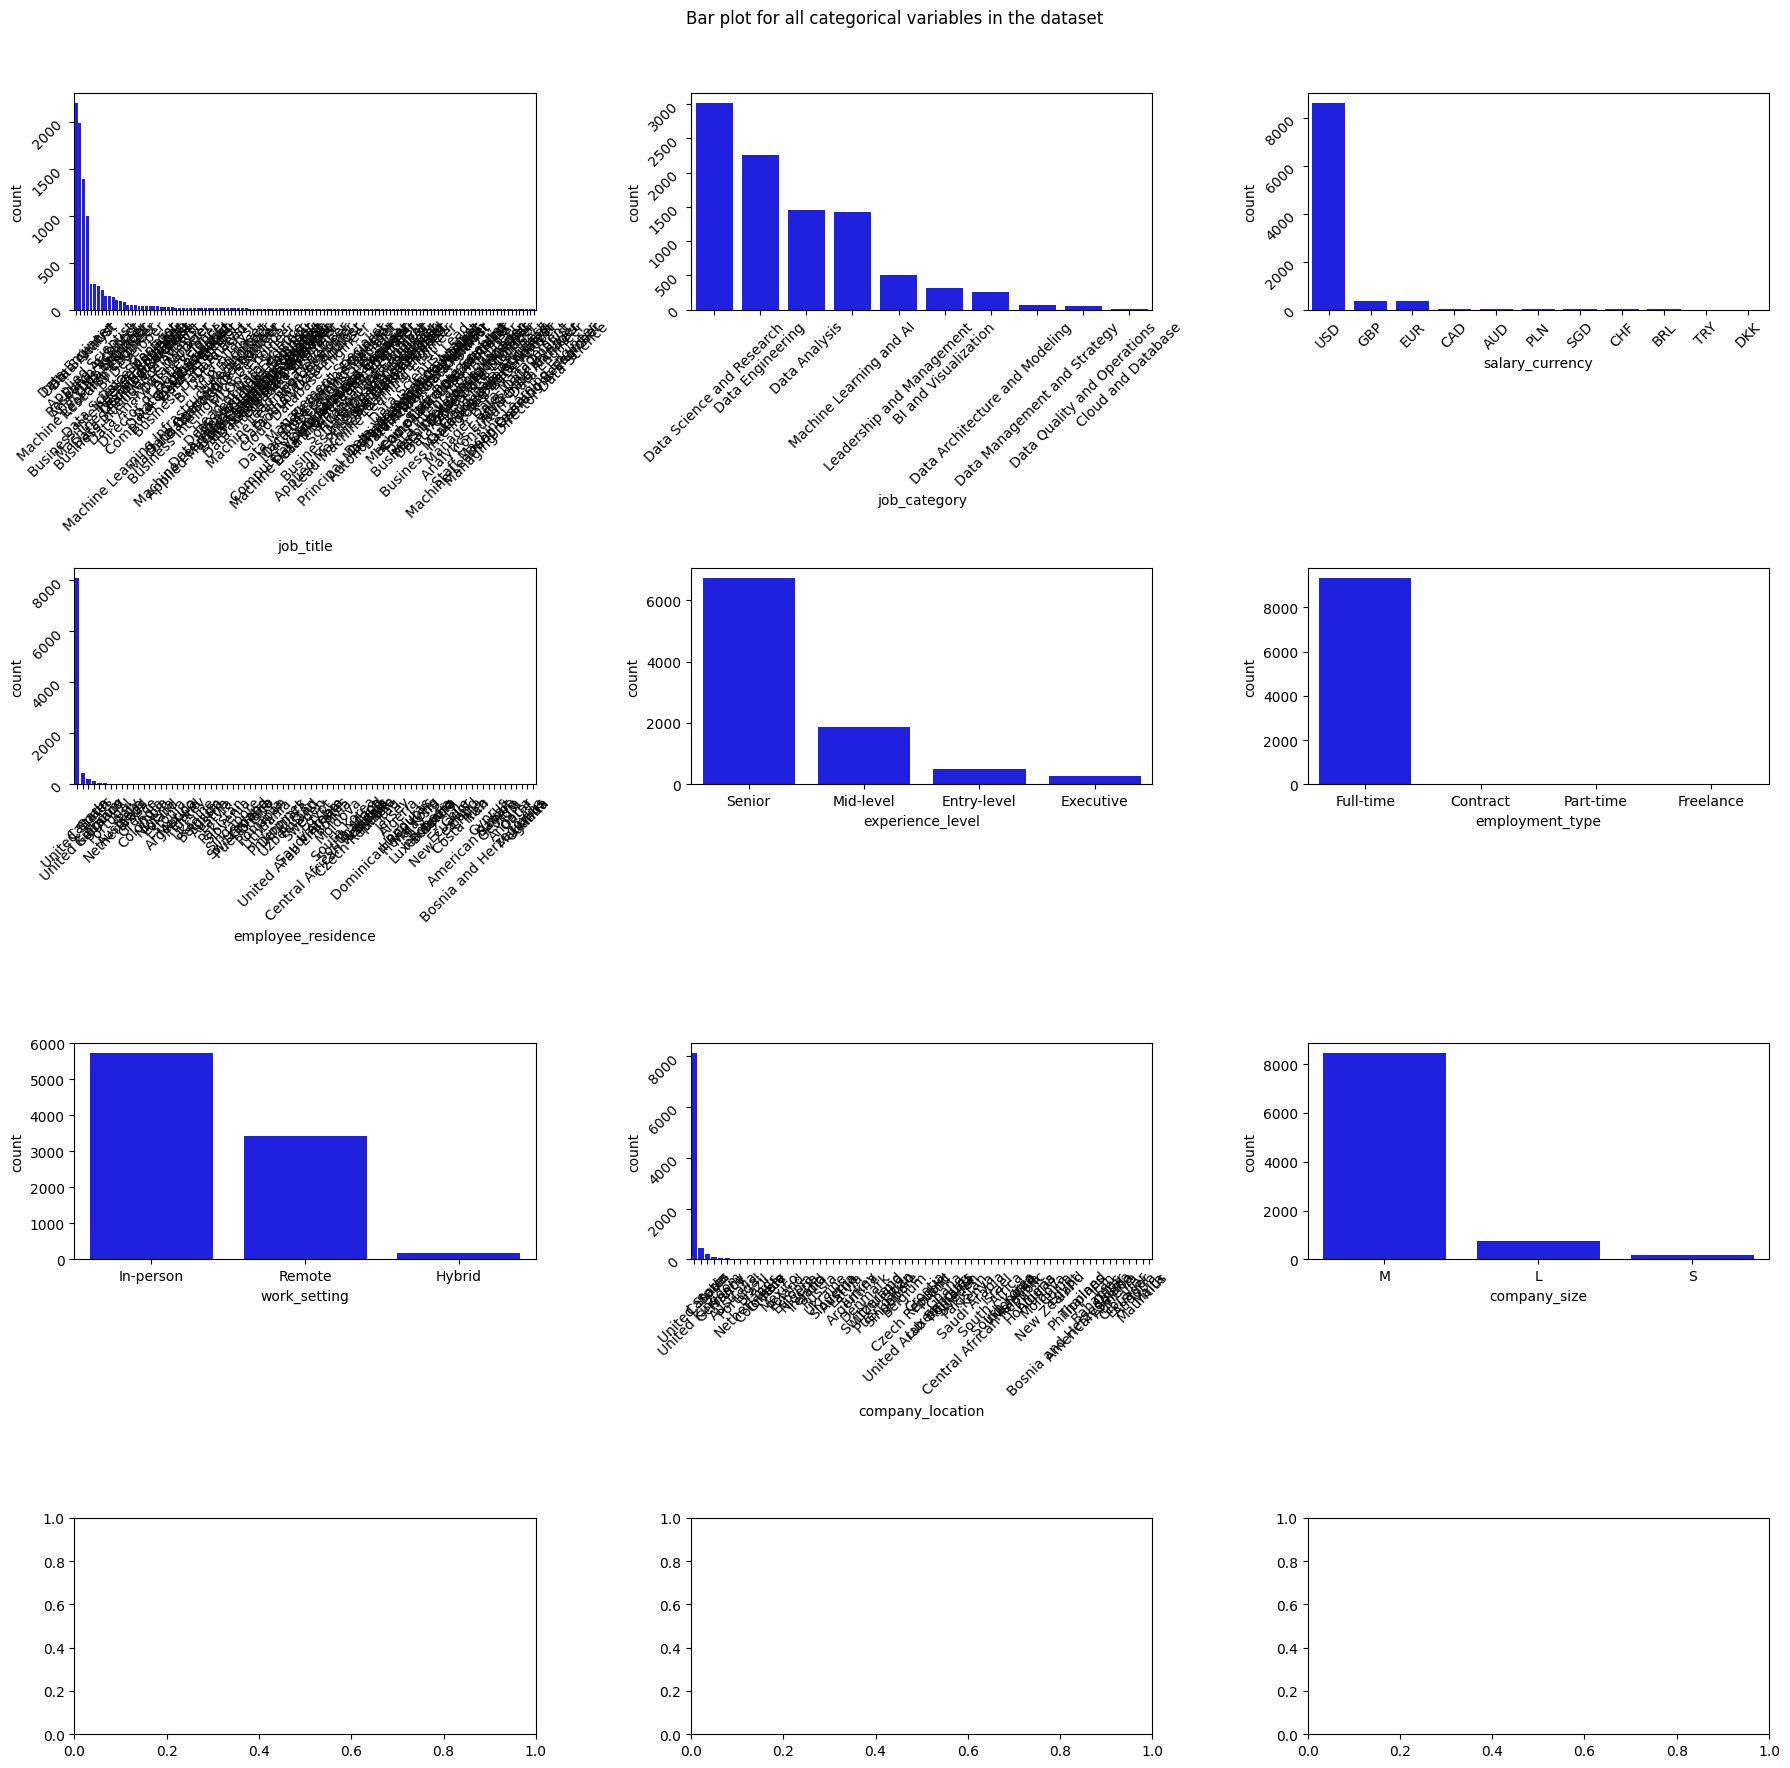

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define categorical variables in the job dataset
categorical_variables = ['job_title', 'job_category', 'salary_currency', 'employee_residence',
                           'experience_level', 'employment_type', 'work_setting',
                           'company_location', 'company_size',]

# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')

# Flatten the axes for easier iteration
axes = axes.flatten()

# Visualize count plots for each categorical variable
for i, cat_var in enumerate(categorical_variables):
    sns.countplot(ax=axes[i], x=cat_var, data=data, color='blue',
                  order=data[cat_var].value_counts().index)
    axes[i].tick_params(labelrotation=45 if len(data[cat_var].unique()) > 5 else 0)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent clipping of titles
plt.show() #categorical variables are being visualized using a count plot.


Step 10: Data Transformation

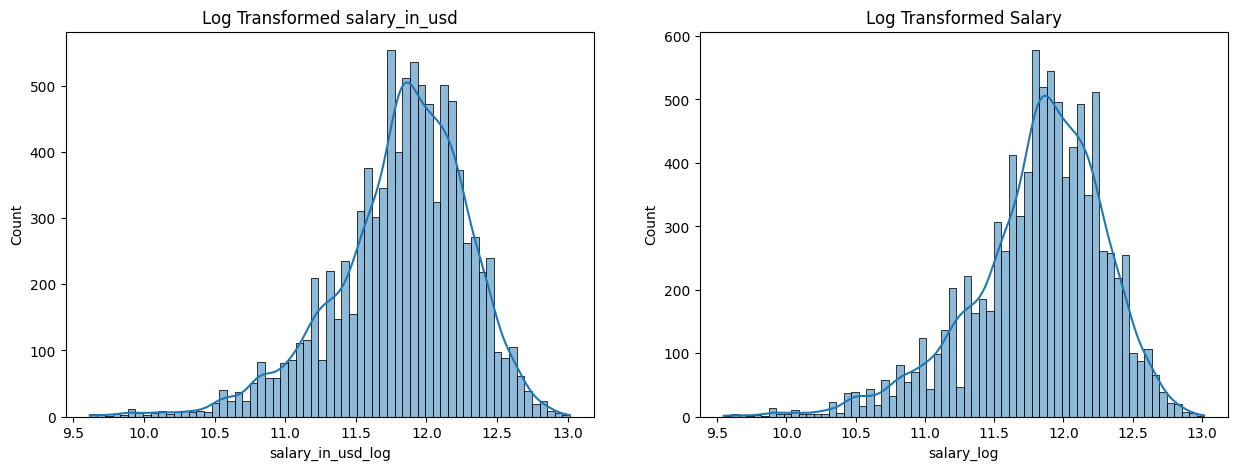

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'salary_in_usd' and 'salary' are columns in your dataset
# Log transform the features
data['salary_in_usd_log'] = np.log1p(data['salary_in_usd'])
data['salary_log'] = np.log1p(data['salary'])

# Plot the log-transformed feature distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Log transformation of the attribute 'salary_in_usd'
sns.histplot(data['salary_in_usd_log'], ax=axes[0], kde=True)  # Use histplot instead of distplot
axes[0].set_title('Log Transformed salary_in_usd')
axes[0].set_xlabel('salary_in_usd_log')

# Log transformation of the attribute 'salary'
sns.histplot(data['salary_log'], ax=axes[1], kde=True)  # Use histplot instead of distplot
axes[1].set_title('Log Transformed Salary')
axes[1].set_xlabel('salary_log')

plt.show()


Step 12: EDA Bivariate Analysis

<Figure size 1300x1700 with 0 Axes>

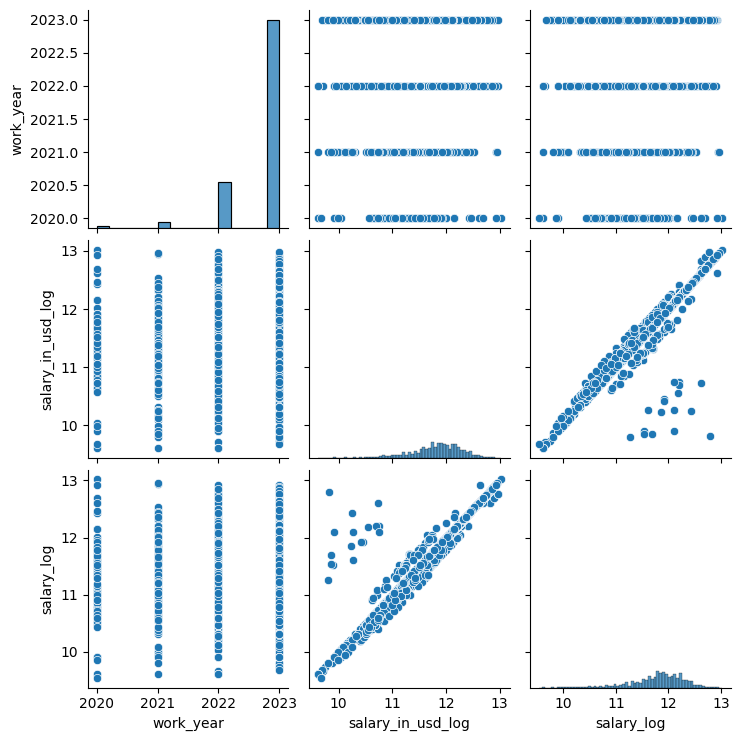

In [ ]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['salary_in_usd','salary'],axis=1))
plt.show()

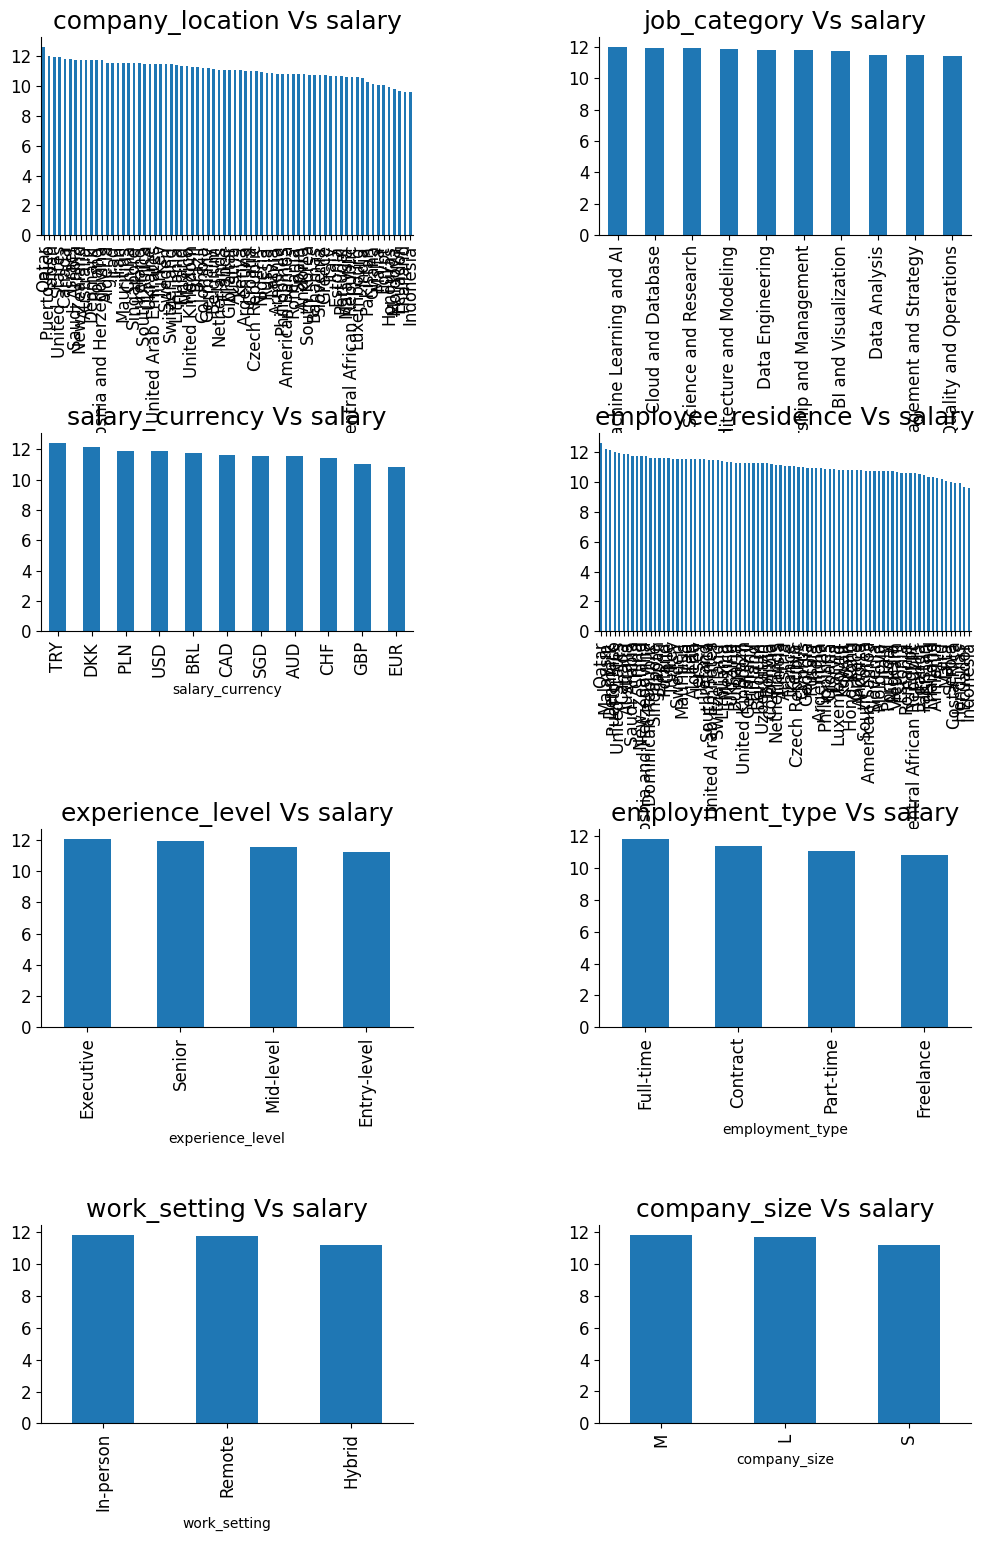

In [ ]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
data.groupby('company_location')['salary_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("company_location Vs salary", fontsize=18)
data.groupby('job_category')['salary_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("job_category Vs salary", fontsize=18)
data.groupby('salary_currency')['salary_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("salary_currency Vs salary", fontsize=18)
data.groupby('employee_residence')['salary_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("employee_residence Vs salary", fontsize=18)
data.groupby('experience_level')['salary_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("experience_level Vs salary", fontsize=18)
data.groupby('employment_type')['salary_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("employment_type Vs salary", fontsize=18)
data.groupby('work_setting')['salary_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("work_setting Vs salary", fontsize=18)
data.groupby('company_size')['salary_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("company_size Vs salary", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()#here bar plot is used to show the relationship between Categorical variables and continuous variables

Step 13: EDA Multivariate Analysis


<ipython-input-22-2d0bbce1341e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.drop(['salary_in_usd','salary'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)


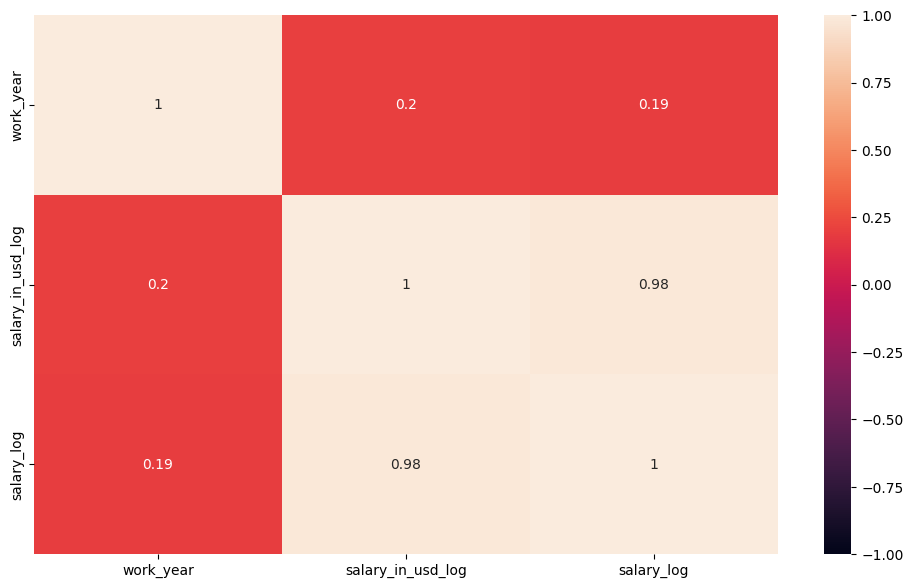

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['salary_in_usd','salary'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()#heat map shows the correlation between the variables.